# Linear Regression

Boise State University\
Department of Computer Science\
CS 334 Algorithms of Machine Learning\
Conrad Kennington\
Fall 2020

Remember the equation for plotting a line on a graph?\
y = mx + b\
The slop is x.\
The y intercept is b.

If you plot a bunch of data on a graph, and see a cluster of dots, linear regression figures out where to draw a line through the dots where they are all as close to the line as possible. That's it.

It's super useful, and the probably the simplest model for machine learning. That's right, the "line" is essentially a model. An equation that maps inputs to outputs, aka a "prediction".

Linear regression is a method for approximating a linear relationship between two variables. It's a good introductory ML algorithm that comes from the field of statistics, and is over 200 years old. It's the "hello world" of Machine Learning. 

# Import libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.datasets import make_classification
import seaborn as sns

# Make up some data

In [2]:
data = {
        'GPA': [3.0, 3.7],
        'Hours Studied': [2, 8]
        }

df = pd.DataFrame(data, columns = ['GPA', 'Hours Studied'])

## Print the data.

In [20]:
# It's common to print the data, just for a sanity check.
print(df.shape)
df.head()

(8, 2)


,GPA,Hours Studied
0,3.0,2
1,3.7,8
2,3.3,3
3,2.5,1
4,4.0,12


# Plot on a graph

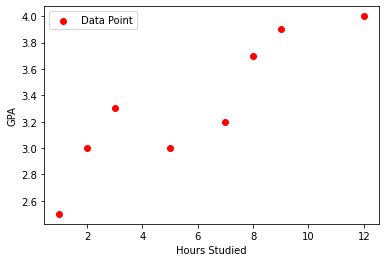

In [21]:
# Using the matplotlib library
X = df['Hours Studied'].values
Y = df['GPA'].values

# Plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')

# axis labels
plt.xlabel('Hours Studied')
plt.ylabel('GPA')

plt.legend()
plt.show()

## Calculate the line
Linear Regression, from scratch using "least squares" method.

In [22]:
# Really good explanation of this algorithm:
# https://www.youtube.com/watch?v=JvS2triCgOY

x_mean = np.mean(X)
y_mean = np.mean(Y)

#total number of values
n = len(X)

# Using the least square method to to calculate the b1 and b0 (y = mx + b, which is a line on a graph)
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2

b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)

# Print the slope (b0) and the y intercept (b1)
print(b1, b0)

0.12118959107806693 2.613011152416357


## Plot the line against the data.

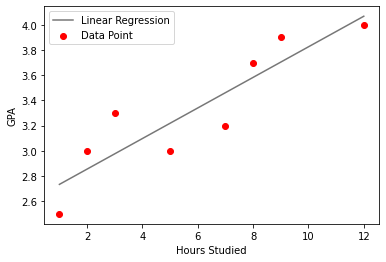

In [23]:
#plotting values 

# graph dimensions
x_max = np.max(X)
x_min = np.min(X)

# calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x

#plotting line 
plt.plot(x, y, color='#777777', label='Linear Regression')

#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')

# x-axis label
plt.xlabel('Hours Studied')

#y-axis label
plt.ylabel('GPA')

plt.legend()
plt.show()

The idea is that for a given number of hours studied, the line tells you the mean predicted GPA.

## How good is this "model"?

Every model has ways (usually more than one) to determine accuracy.\
This example shows how good this model is depends on how much "error" there is between the model and all the data points.\
If you give it a new data point, it basically shows how much you can "trust" the model.

In [25]:
# Root Mean Squared Error "rmse" method.
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print(rmse) # Lower is better. 0.0 is a perfect model, no errors.

0.21019551882432927


Here's another algorithm to determine accuracy for Logistic Regression.\
"Sum of squares of residuals"

In [26]:
sumofsquares = 0
sumofresiduals = 0
for i in range(n) :
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score) # The higher the score, the better. 1.0 is a perfect model, 100% accurate.

0.8073802457380754


# Now try a different data set, watch the line move, and the accuracy change.
You can run this data cell only, then go back to "print the data" and run each cell after that.

In [11]:
data = {'GPA': [3.0, 3.7, 3.3],
        'Hours Studied': [2, 8, 3]
        }
df = pd.DataFrame(data, columns = ['GPA', 'Hours Studied'])

In [19]:
data = {'GPA': [3.0, 3.7, 3.3, 2.5, 4.0, 3.2, 3.9, 3.0],
        'Hours Studied': [2, 8, 3, 1, 12, 7, 9, 5]
        }
df = pd.DataFrame(data, columns = ['GPA', 'Hours Studied'])

## THERE ARE OTHER APPROACHES TOO.
The approach above was a direct calculation.\
**Most machine learning algorithms don't have that option!!**\
\
Machine Learning usually has to *find* the optimal solution by *trying* different models.\
This is called **optimization**, and involves something called a **cost function**\.